# <font color = "red"> Classifieur de chiffres 

## <font color = "bleu"> Importation de librairies 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, img_as_float
from skimage.color import rgb2gray
import cv2 

##  <font color = "bleu"> Chargement des images 

In [2]:
dataset_5_INC = {f"INC_5{i}" : rgb2gray(io.imread(f"INC_5/5{i}.jpg")) for i in range(1,9)}
dataset_9_INC = {f"INC_9{i}" : rgb2gray(io.imread(f"INC_9/9{i}.jpg")) for i in range(1,9)}
dataset_5_LED = {f"LED_5{i}" : rgb2gray(io.imread(f"LED_5/5{i}.jpg")) for i in range(1,9)}
dataset_9_LED = {f"LED_9{i}" : rgb2gray(io.imread(f"LED_9/9{i}.jpg")) for i in range(1,9)}

## <font color = "bleu"> Chiffres 5 et 9 illuminés par LED  

###  Affichage des images :

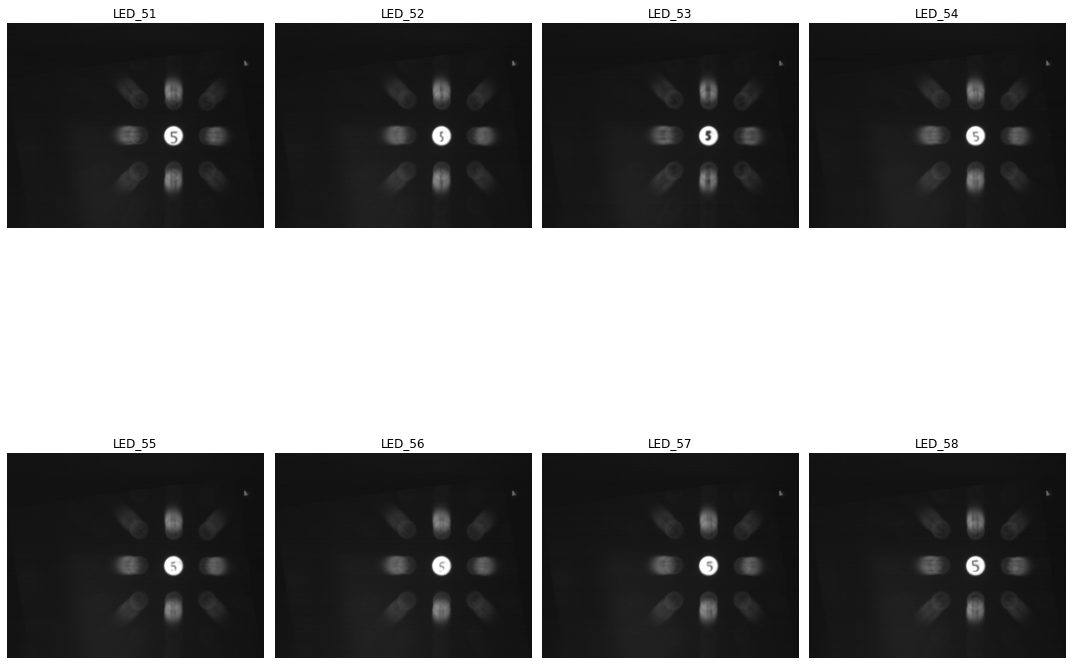

In [3]:
axes=[]
f = plt.figure(figsize=(15,15)) # figure 
plt.imshow(NG_img1,cmap = 'gray')
for i in range(1,9):
    axes.append(f.add_subplot(2, 4, i))
    subplot_title=("LED_5"+str(i)) 
    axes[-1].set_title(subplot_title)  
    plt.imshow(dataset_5_LED['LED_5'+str(i)], cmap='gray'),plt.axis('off')
f.tight_layout()    
plt.show()

###  Binarisation de l'ordre 0 : Chiffre au milieu

In [4]:
# fonction de binarisation 
def binarise(input_image, seuil):
    dim = input_image.shape 
    out_image = np.zeros([dim[0], dim[1]]);
    for i in range (0, dim[0], 1) :
        for j in range (0, dim[1], 1) :
            if input_image[i][j] < seuil :
                out_image[i][j] = 0       
            else :
                out_image[i][j] = 1
    return (out_image)

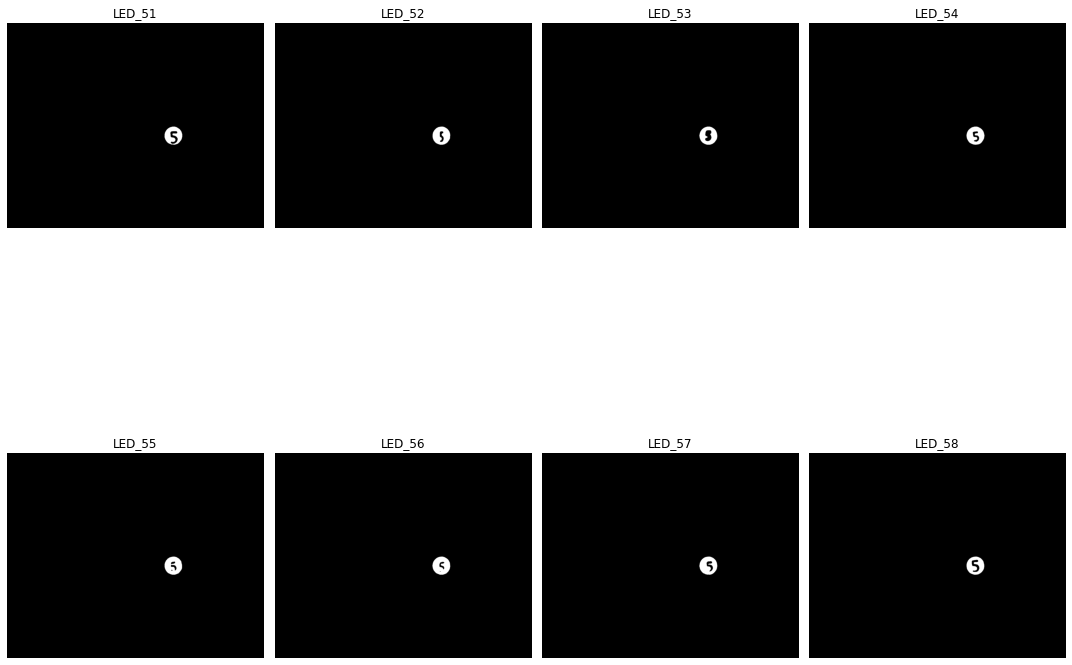

In [5]:
axes=[]
f = plt.figure(figsize=(15,15)) # figure 
for i in range(1,9):
    axes.append(f.add_subplot(2, 4, i))
    subplot_title=("LED_5"+str(i)) 
    axes[-1].set_title(subplot_title)  
    plt.imshow(binarise(dataset_5_LED['LED_5'+str(i)], 0.8), cmap='gray'),plt.axis('off')
f.tight_layout()    
plt.show()

###  Crop de l'ordre 0 :

In [6]:
def imfill(image_crop) :
    dim = image_crop.shape 
    im1 = np.zeros([dim[0], dim[1]])
    R=41
    for i in range (0, dim[0], 1) :
        for j in range (0, dim[1], 1) :
            x= i - dim[0]/2;
            y= j - dim[1]/2;
            if x**2 + y**2<= R**2 :
                im1[i, j] = image_crop[i, j]
            else : im1[i, j] = 1
    return (im1)

Text(0.5, 1.0, 'LED_51 remplie')

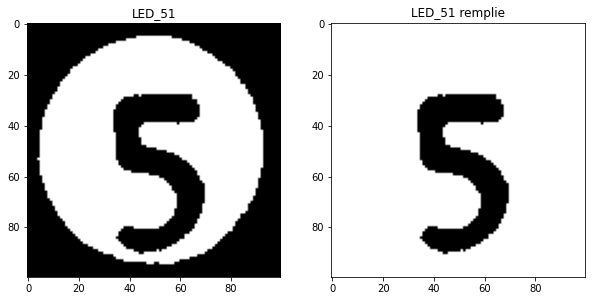

In [7]:
BW = binarise(dataset_5_LED['LED_51'], 0.8)
image_crop = BW[515:615, 780:880]
f=plt.figure(figsize=(10,10))
f.add_subplot(1, 2, 1)
plt.imshow(image_crop, cmap='gray')
plt.title('LED_51')
f.add_subplot(1, 2, 2)
plt.imshow(imfill(image_crop), cmap='gray')
plt.title('LED_51 remplie')

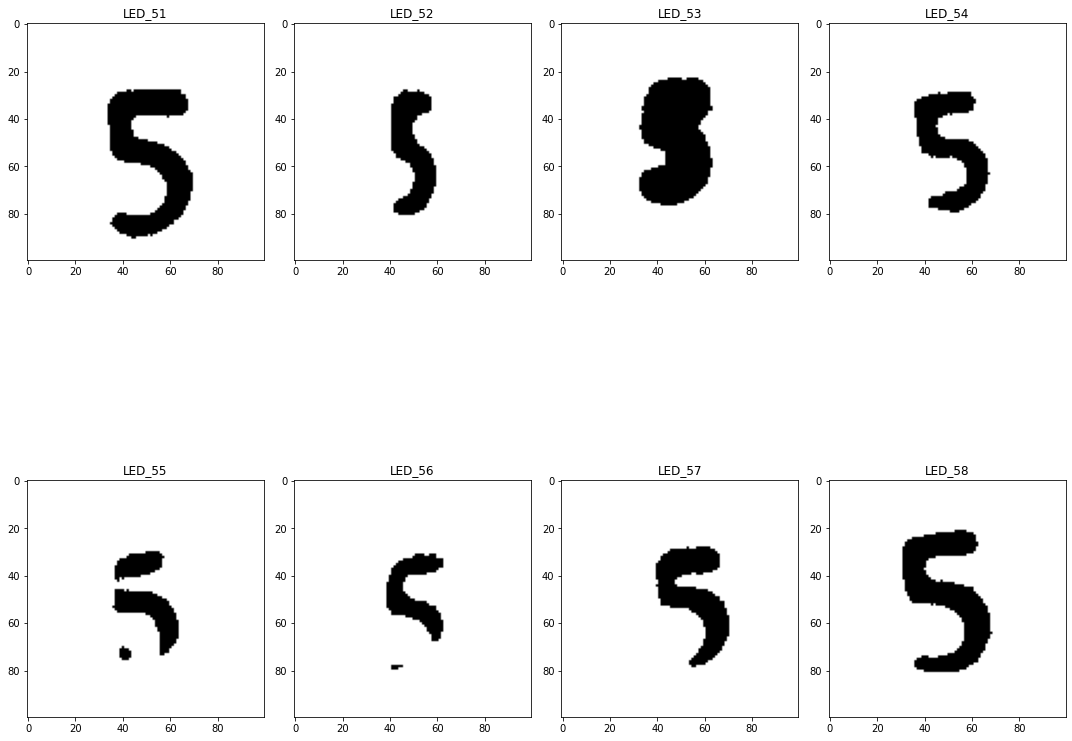

In [8]:
axes=[]
f = plt.figure(figsize=(15,15)) # figure 
for i in range(1,9):
    im_bin = binarise(dataset_5_LED['LED_5'+str(i)], 0.8)
    im_fill = imfill(im_bin[515:615, 780:880])
    axes.append(f.add_subplot(2,4,i))
    subplot_title=("LED_5"+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(im_fill, cmap='gray')
f.tight_layout()    
plt.show()

###  Entropie locale

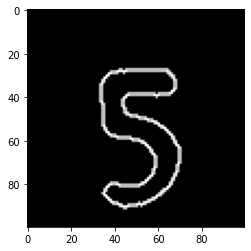

In [14]:
from skimage.filters.rank import entropy
from skimage.util import img_as_ubyte
from skimage.morphology import disk
entrop = entropy(img_as_ubyte(imfill(image_crop)), disk(1))
plt.imshow(entrop, cmap='gray')

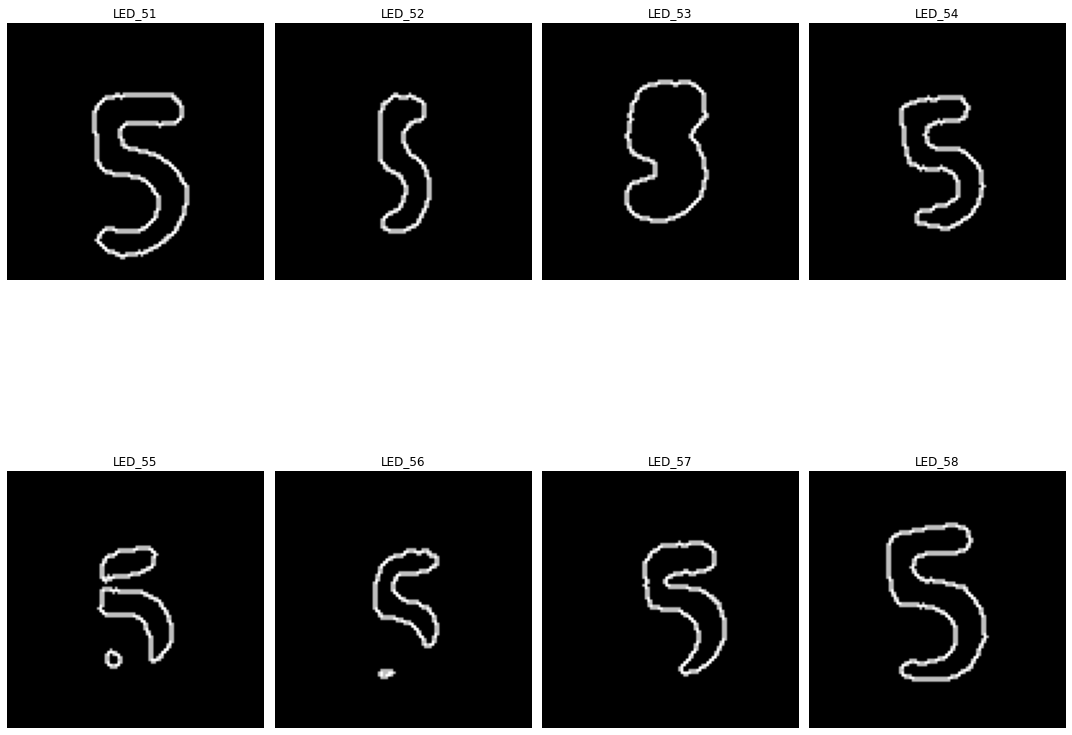

In [15]:
axes=[]
f = plt.figure(figsize=(15,15)) # figure 
for i in range(1,9) :
    led_5 = dataset_5_LED['LED_5'+str(i)] 
    axes.append(f.add_subplot(2,4,i))
    subplot_title=("LED_5"+str(i))
    axes[-1].set_title(subplot_title)
    plt.imshow(entropy(img_as_ubyte(imfill(binarise(led_5,0.8)[515:615, 780:880])), disk(1)), cmap='gray'),plt.axis('off')
f.tight_layout()    
plt.show()

## Méthode 1 :  Espace des descripteurs 

## <font color = "bleu"> Les descripteurs 

### Nombre d'euler

In [11]:
from skimage.measure import euler_number, label
for i in range(1,9) :
    im_bin_5 = binarise(dataset_5_LED['LED_5'+str(i)], 0.8)
    im_fill_5 = imfill(im_bin_5[515:615, 780:880])
    euler_N_5 = euler_number(im_fill_5)
    im_bin_9 = binarise(dataset_9_LED['LED_9'+str(i)], 0.8)
    im_fill_9 = imfill(im_bin_9[515:615, 780:880])
    euler_N_9 = euler_number(im_fill_9)

###  Variance 

In [12]:
V_5 = []
V_9 = []
for i in range(1,9) :
    led_5 = dataset_5_LED['LED_5'+str(i)][495:635, 500:740] 
    spect_5 = sum(led_5)
    Var_5 = np.var(spect_5)
    led_9 = dataset_9_LED['LED_9'+str(i)][495:635, 500:740] 
    spect_9 = sum(led_9)
    Var_9 = np.var(spect_9)
    V_5.append((Var_5))
    V_9.append((Var_9))
X2 = np.hstack((V_5, V_9)) 

###  Amplitude max

In [13]:
X_5 = []
X_9 = []
y_5 = []
y_9 = []
for i in range(1,9) :
    led_5 = dataset_5_LED['LED_5'+str(i)][495:635, 500:740] 
    spect_5 = sum(led_5)
    ampl_max_5 = max(spect_5)
    led_9 = dataset_9_LED['LED_9'+str(i)][495:635, 500:740] 
    spect_9 = sum(led_9)
    ampl_max_9 = max(spect_9)
    # Récupération des valeurs dans un tableau   
    X_5.append((ampl_max_5))
    X_9.append((ampl_max_9))
    y_5.append((5))
    y_9.append((9))
X1 = np.hstack((X_5,  X_9))
y  = np.hstack([y_5, y_9]) 

###  Circularité

In [16]:
from skimage.measure import label, regionprops
from skimage import data, util, measure
from skimage.measure import perimeter_crofton
for i in range(1,9) :
    led_5 = dataset_5_LED['LED_5'+str(i)]
    q = entropy(img_as_ubyte(imfill(binarise(led_5,0.8)[515:615, 780:880])), disk(1))
    perimeter = perimeter_crofton(q) # perimètre
    area = cv2.countNonZero(q) # surface 
    #print('le perimètre '+ str(i)+' = ', perimeter)
    #print('la surface '+ str(i)+'=', area)
    C = 4*np.pi*(area/perimeter**2)
    #print('La circularité '+str(i)+'=', C) # circularité 

## <font color = "bleu"> Espace de descripteurs  

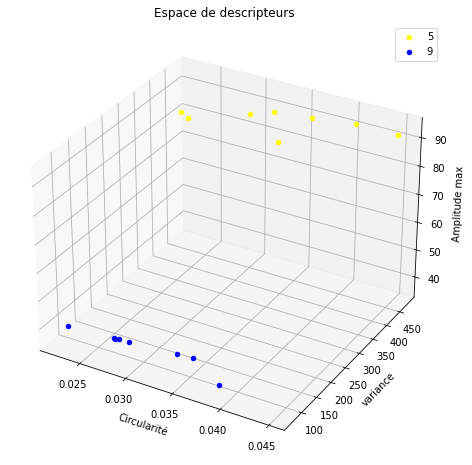

In [17]:
import math
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for i in range (1, 9) :
    # 5 d'ordre 0
    im_bin_5 = binarise(dataset_5_LED['LED_5'+str(i)], 0.8)
    im_fill_5 = imfill(im_bin_5[515:615, 780:880])
    nbr_num_5 =  euler_number(im_fill_5) # nombre d'euler des 5
    Var_5 = np.var(sum(dataset_5_LED['LED_5'+str(i)][515:615, 780:880]))  # Variance de 5 
    amp_max_5 = max(sum(dataset_5_LED['LED_5'+str(i)][515:615, 780:880]))
    q = entropy(img_as_ubyte(im_fill_5), disk(1))
    perimeter = perimeter_crofton(q) # perimètre
    area = cv2.countNonZero(q) # surface 
    C1 = 4*np.pi*(area/perimeter**2)
    # 9 d'ordre 1
    neuf_1 = dataset_9_LED['LED_9'+str(i)]
    im_fill_9 = imfill(binarise(dataset_9_LED['LED_9'+str(i)], 0.8)[515:615, 780:880])  
    crop_9_1 = neuf_1[495:635, 500:740]  
    nbr_num_9 = euler_number(im_fill_9) # nombre d'euler des 9
    amp_max_9 = max(sum(crop_9_1)) # amplitude max des 9
    Var_9 = np.var(sum(crop_9_1))  # Variance de 9
    q1 = entropy(img_as_ubyte(im_fill_9), disk(1))
    perimeter1 = perimeter_crofton(q1) # perimètre
    area1 = cv2.countNonZero(q1)
    C2 = 4*np.pi*(area1/perimeter1**2)   
    ax.scatter(C1, Var_5, amp_max_5, c = 'yellow',marker='o', cmap='summer'), ax.scatter(C2, Var_9, amp_max_9, marker='o',c = 'blue', cmap='summer')
    ax.legend(['5', '9'])
    ax.set_ylabel('variance')
    ax.set_xlabel('Circularité')
    ax.set_zlabel('Amplitude max')
    ax.set_title('Espace de descripteurs')
    
    #plt.xlim(-2, 2) 

## Méthode 2 : K Nearest Neighbors (K-NN)

## <font color = "bleu"> Classifieur de type K-NN 

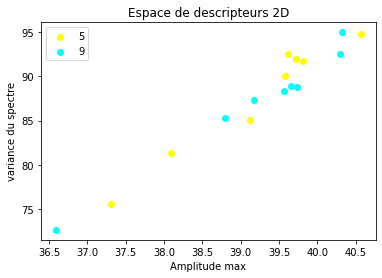

In [18]:
for i in range (1, 9) :
    # 5 d'ordre 0
    im_bin_5 = binarise(dataset_5_LED['LED_5'+str(i)], 0.8)
    im_fill_5 = imfill(im_bin_5[515:615, 780:880])
    nbr_num_5 =  euler_number(im_fill_5) # nombre d'euler des 5
    Var_5 = np.var(sum(dataset_5_LED['LED_5'+str(i)][495:635, 500:740]))  # Variance de 5 
    amp_max_5 = max(sum(dataset_5_LED['LED_5'+str(i)][495:635, 500:740]))
    # 9 d'ordre 1
    neuf_1 = dataset_9_LED['LED_9'+str(i)]
    im_fill_9 = imfill(binarise(dataset_9_LED['LED_9'+str(i)], 0.8)[515:615, 780:880])  
    crop_9_1 = neuf_1[495:635, 500:740]  
    nbr_num_9 = euler_number(im_fill_9) # nombre d'euler des 9
    Var_9 = np.var(sum(crop_9_1))  # Variance de 9
    amp_max_9 = max(sum(crop_9_1)) # amplitude max des 9
    plt.scatter(amp_max_5, Var_5, c = 'yellow', cmap='summer'), plt.scatter(amp_max_9,Var_9, c = 'cyan', cmap='summer')
    plt.legend(['5', '9'])
    plt.ylabel('variance du spectre')
    plt.xlabel('Amplitude max')
    plt.title('Espace de descripteurs 2D')

###  Recupértion de données dans un tableau pandas 

In [19]:
import pandas as pd

In [20]:
# redimentionnement des datas
y = y.reshape(16,1)
X = X1.reshape(16,1)
Y = X2.reshape(16,1)
W = np.hstack((X, Y)) 
index = ['51','52','53','54','55','56','57','58','91','92','93','94','95','96','97','98']
columns = ['Amplitude Max','Variance']
df = pd.DataFrame(data=W, columns=columns, index = index)

In [21]:
df

,Amplitude Max,Variance
51,38.090196,81.330568
52,39.725490,91.921814
53,37.313725,75.579092
54,39.576471,90.017091
55,39.819608,91.678016
56,40.564706,94.768956
57,39.615686,92.519808
58,39.121569,85.083075
91,39.180392,87.313995
92,39.741176,88.820458


### <font color = "bleu"> Jeu d’entraînement et de test : 80 % pour l'entrainement et 20 % pour le test 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,np.ravel (y), test_size = 0.2)

In [36]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    Amplitude Max   Variance
92      39.741176  88.820458
91      39.180392  87.313995
54      39.576471  90.017091
96      39.662745  88.929008
94      38.796078  85.257816
58      39.121569  85.083075
57      39.615686  92.519808
55      39.819608  91.678016
51      38.090196  81.330568
97      40.321569  94.945579
93      36.592157  72.694934
53      37.313725  75.579092
[9 9 5 9 9 5 5 5 5 9 9 5]
    Amplitude Max   Variance
98      40.294118  92.548923
95      39.564706  88.368075
52      39.725490  91.921814
56      40.564706  94.768956
[9 9 5 5]


###  Définition du modèle K-NN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # on fixe initialement le nomnre de proche voisins à 1 

### Entrainement du modèle par la méthode fit 

In [38]:
model.fit(X_train, y_train)
print('test score:', model.score(X_test, y_test))

test score: 0.5


#####  notre modèle a réussit de nous donner 50 % de vrai prédictions sur des donnés qui n'a jamais vu auparavant (test set)

Afin d'améliorer notre modèle, il va falloir régler les hyper-paramètres du modèle comme le nombre de proche voisin. pour cela, on divise nos données en 3 ème section qu'on appelera la validation qui nous permettera de chercher les règlages du modèle qui nous donnent les meilleurs performances tout en gardant de coté les données de test pour évaluer la machine sur ces données. 
La cross validation consiste à entrainer puis valider le modèle sur plusieurs découpes possibles de train set. pour cela, on importe le module cross_val_score et on prendera 5 comme nombre de découpes.

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.33333333, 0.33333333, 0.5       , 0.        , 0.5       ])

Text(0, 0.5, 'Score')

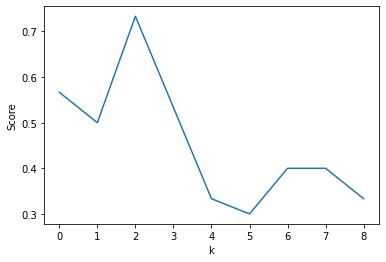

In [41]:
val_score = []
for k in range(1, 10):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)
plt.xlabel('k')
plt.ylabel('Score')

#### On constate que le meilleur score (75%) est atteind lorsque le nombre de proches voisins est 2 

#### Pour améliorer encore notre modèle, nous proposons d'utiliser plusieurs métriques disponibles sur le module de la bibliothèque sklearn .  

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'n_neighbors': np.arange(1, 9),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [44]:
print(grid.best_score_)
print(grid.best_params_)

0.7333333333333333
{'metric': 'euclidean', 'n_neighbors': 3}


#### La métrique qui donne la meilleur performance est celle d'euclide avec 3 proches voisins.   

In [45]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.75

### <font color = "red"> Matrice de confusion 

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, model.predict(X_test))

array([[2, 0],
       [1, 1]], dtype=int64)

#### Les coeficients de la matrice de confusion nous renseigne sur le classement de données de teste, en occurence on avait pris 20% de données pour le test : les deux chiffres de 5 ont été bien classés, par contre pour les 9, seul 1 qui été bien classé.
#### On pourra dire que notre modèle 75% de ses prédictions sont correctes.